<a href="https://colab.research.google.com/github/actuallyachraf/ai-notebooks/blob/main/Fashion_MNIST_AGAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

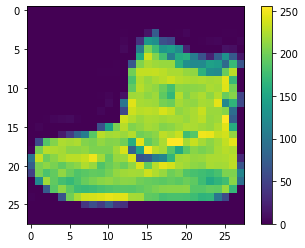

In [7]:
# preprocess
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
class_names[train_labels[0]]

'Ankle boot'

In [9]:
# 0..1 scaler
train_images = train_images / 255.0
test_images = test_images / 255.0

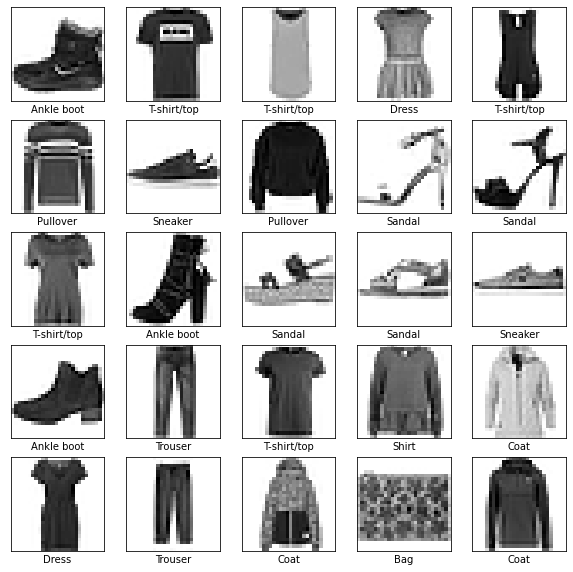

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [11]:
# build the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)                            
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5192 - accuracy: 0.8196
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3886 - accuracy: 0.8618
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3495 - accuracy: 0.8739
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8814
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3070 - accuracy: 0.8875
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2900 - accuracy: 0.8940
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2784 - accuracy: 0.8974
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2681 - accuracy: 0.9006
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2607 - accuracy: 0.9031
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2487 - accuracy: 0.9077

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3317 - accuracy: 0.8842

Test accuracy: 0.8841999769210815


In [16]:
# attach a Softmax output to our logit model's output
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [17]:
predictions = probability_model.predict(test_images)

In [18]:
# prediction on test image [0]
prediction = predictions[0]
np.argmax(prediction)

9

In [19]:
class_names[test_labels[0]]

'Ankle boot'

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


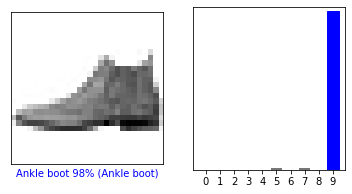

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


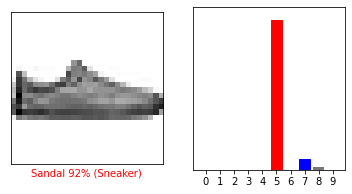

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


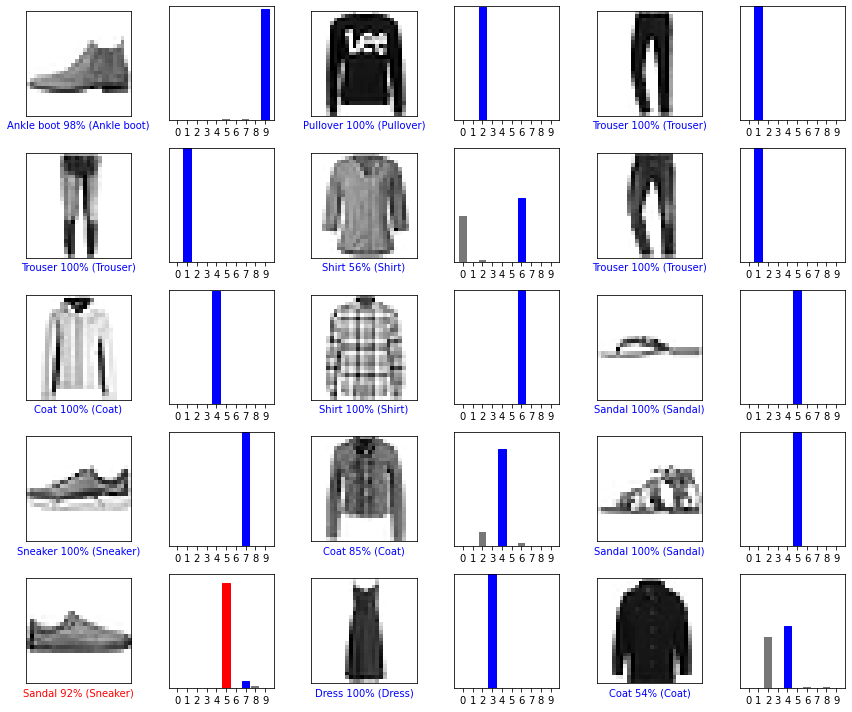

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
